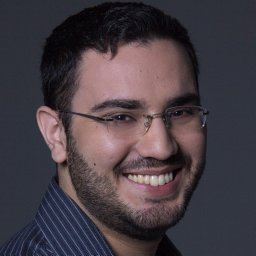

# Word Embeddings: A Survey — Structured Summary  
*(Based on Felipe Almeida & Geraldo Xexéo)*

# https://arxiv.org/abs/1901.09069
---

## Abstract

This paper surveys the main approaches for building dense, low-dimensional, distributed word representations known as **word embeddings**. The authors integrate the perspectives of **prediction-based neural models** and **count-based matrix-factorization models**, explaining their mathematical foundations, design choices, and empirical behaviors. The survey emphasizes how embeddings encode syntactic and semantic relations and how these representations significantly improve natural-language processing tasks.

---

## Problems

1. Traditional sparse, high-dimensional representations (e.g., one-hot vectors, classical Vector Space Models) fail to capture semantic similarity.  
2. Statistical n-gram language models suffer from data sparsity, poor generalization, and dimensional explosion.  
3. Early neural language models were slow to train due to expensive softmax computations:  
   $$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{|V|} e^{z_j}}$$  
4. Count-based representations depend heavily on normalization, weighting, and dimensionality reduction choices.  
5. Existing literature lacked a unified survey connecting classical techniques, neural models, and modern theoretical results that show equivalence between model families.

---

## Proposed Solutions

### Prediction-based Models  
- Learn vector representations jointly with a neural language model.  
- Key improvements include hierarchical softmax, negative sampling, subword modeling, and efficient log-linear formulations.  
- Examples: NNLM, CBOW, Skip-gram, FastText.

### Count-based Models  
- Use global co-occurrence statistics from large corpora.  
- Employ matrix factorization techniques such as SVD, Hellinger PCA, and CCA.  
- GloVe formalizes word-vector learning using co-occurrence ratios:  
  $$w_i^\top \tilde{w}_j + b_i + \tilde{b}_j = \log X_{ij}$$  
  where \(X_{ij}\) is the co-occurrence count.

### Unified Perspective  
- Shows how prediction methods implicitly factorize variants of the **Pointwise Mutual Information (PMI)** matrix:  
  $$\text{PMI}(w,c) = \log \frac{p(w,c)}{p(w)p(c)}$$  
- Demonstrates that Skip-gram with Negative Sampling (SGNS) ≈ Factorizing a **shifted PMI** matrix.

---

## Purpose

To present a clear, structured, and comprehensive review of both **neural** and **statistical** embedding methods, highlight their historical evolution, compare architectures, and offer theoretical insight demonstrating how previously distinct families of models relate mathematically. The goal is to guide researchers toward a unified understanding and identify open directions for future work.

---

## Methodology

- Systematic literature review covering:
  - Vector Space Models  
  - Statistical and neural language models  
  - Prediction-based embeddings (NNLM, CBOW, Skip-gram, FastText)  
  - Count-based embeddings (LSA, HAL, COALS, LR-MVL, GloVe)  
- Categorization by:
  - **Prediction-based**: local context windows, neural network training, sampling strategies.  
  - **Count-based**: global matrices, normalization, factorization.  
- Comparative tables show differences in architecture, context representation, complexity, and empirical results.  
- Mathematical synthesis explaining equivalences (e.g., SGNS and PMI factorization).

---

## Results

### Prediction-Based Models
- CBOW and Skip-gram (especially SGNS) produce high-quality embeddings with strong semantic regularities.  
- Hierarchical softmax and negative sampling significantly reduce training cost from \(O(|V|)\) to near-constant time.  
- Subword embedding approaches (FastText) yield better performance for morphologically complex languages.

### Count-Based Models
- Early methods like LSA and HAL perform moderately well but require improved normalization.  
- COALS, CCA, and Hellinger PCA enhance robustness and interpretability.  
- GloVe achieves near state-of-the-art performance using a principled log-bilinear model based on co-occurrence ratios.

### Cross-Model Insights
- Empirical convergence of semantic structures across both families.  
- SGNS mathematically interpretable as factorizing a shifted PMI matrix:  
  $$\text{SGNS} \approx \text{SVD}(\text{PMI}(w,c) - \log k)$$  
  where \(k\) is the number of negative samples.

### Practical Impact
- Word embeddings improve a wide range of NLP tasks: POS tagging, chunking, NER, parsing, sentiment analysis, analogy tasks.

---

## Conclusions

Word embeddings form a foundational component of modern NLP. Their development followed two complementary lines:

1. **Prediction-based neural embeddings** that learn representations from local context and optimize predictive objectives.  
2. **Count-based matrix embeddings** that extract global corpus statistics and apply factorization.

These approaches ultimately converge mathematically and empirically, leading to widely adopted tools such as **Word2Vec**, **GloVe**, and **FastText**. Research continues in areas such as fine-tuning embeddings for downstream tasks, theoretical unification of embedding paradigms, and the construction of higher-level sentence and document representations.

---


# Mathematical Summary of Core Concepts from *Word Embeddings: A Survey*  
*(Formatted in full Markdown with LaTeX using $$ ... $$ as required)*

---

## 1. Vector Space Model (VSM)

### Mathematical Idea
Represent each document or word as a vector in a high-dimensional space.  
Each dimension corresponds to a term. Term weights commonly use **TF-IDF**:

- Term Frequency:  
  $$\text{TF}(t,d) = \text{count of term } t \text{ in document } d$$

- Inverse Document Frequency:  
  $$\text{IDF}(t) = \log\frac{N}{n_t}$$  
  where \(N\) = number of documents and \(n_t\) = number of documents containing \(t\).

Similarity measures:
$$\text{cosine}(x,y) = \frac{x \cdot y}{\|x\|\|y\|}$$

### Role in the Paper  
Provides the classical mathematical foundation for representing words as vectors.

---

## 2. Statistical Language Models

### 2.1 n-gram Probability Model
Probability of a word sequence:
$$P(w_1^T) = \prod_{t=1}^{T} P(w_t \mid w_1^{t-1})$$

Using the Markov **n-gram** assumption:
$$P(w_t \mid w_1^{t-1}) \approx P(w_t \mid w_{t-n+1}^{t-1})$$

### Role  
Demonstrates sparseness and motivates continuous embeddings.

---

### 2.2 Maximum Likelihood Estimation (MLE)

Conditional probability estimate:
$$P(w_t \mid \text{context}) = \frac{\text{count(context + } w_t)}{\text{count(context)}}$$

### Role  
Basic estimation method for n-gram models.

---

### 2.3 Smoothing Methods

- **Laplace smoothing**:  
  $$P(w_t \mid c) = \frac{\text{count}(c,w_t)+1}{\text{count}(c)+|V|}$$

- **Backoff/Interpolation**:  
  Combine probabilities from higher- and lower-order n-grams.

### Role  
Early solutions for sparsity and data scarcity.

---

## 3. Neural Language Models (NNLMs)

### 3.1 Embedding as Projection

For a one-hot vector \(x\) and weight matrix \(W\):
$$e = Wx$$  
This extracts the embedding for the active index.

### Role  
Defines the core operation transforming discrete words into continuous vectors.

---

### 3.2 Softmax Function

Prediction distribution:
$$P(w \mid \text{context}) = \frac{\exp(z_w)}{\sum_{w'} \exp(z_{w'})}$$

### Role  
Creates a normalized probability; expensive for large vocabularies.

---

### 3.3 Partition Function

Denominator of softmax:
$$Z = \sum_{w' \in V} \exp(z_{w'})$$

### Role  
Major computational bottleneck → motivates approximations.

---

## 4. Approximation and Acceleration Methods

### 4.1 Importance Sampling
Approximate gradients by sampling from an auxiliary distribution.

### Role  
Reduces softmax cost.

---

### 4.2 Hierarchical Softmax

Binary tree over vocabulary.  
Word probability = product of binary decisions:  
$$P(w) = \prod_{j=1}^{\text{path}(w)} P(b_j \mid \text{context})$$

Complexity improves to:
$$O(\log|V|)$$

### Role  
Efficient structured softmax.

---

### 4.3 Noise-Contrastive Estimation (NCE)

Transform density estimation into binary classification between true and noise samples.

### Role  
Avoids computing the partition function.

---

### 4.4 Negative Sampling (Word2Vec)

Sample \(k\) negative words for each positive pair.  
Train logistic regression to distinguish real vs. noise:

$$\log \sigma(v_w^\top v_c) + \sum_{i=1}^{k} \log \sigma(-v_{n_i}^\top v_c)$$

### Role  
Highly efficient for skip-gram embeddings.

---

## 5. Log-Linear Models

General form:
$$
P(y \mid x; v) =
\frac{\exp\big(v \cdot f(x,y)\big)}
{\sum_{y'} \exp\big(v \cdot f(x,y')\big)}
$$

Where:
- \(f(x,y)\): feature function  
- \(v\): parameter vector

### Role  
Mathematical framework encompassing CBOW, skip-gram, and GloVe.

---

## 6. Matrix Factorization and Count-Based Models

### 6.1 Word-Context Matrix
Entries:
$$M_{ij} = \text{co-occurrence count of word } i \text{ with context } j$$

### Role  
Basis of classical count-based embeddings.

---

### 6.2 Singular Value Decomposition (SVD)

Factorization:
$$M = U \Sigma V^\top$$

Truncate to rank \(k\) to obtain embeddings.

### Role  
Used in Latent Semantic Analysis (LSA).

---

### 6.3 Weighted Co-occurrence Methods (HAL, COALS)
Weight counts by:
- distance  
- normalization  
- conditional probability forms  

### Role  
Improved statistical quality and robustness.

---

### 6.4 Canonical Correlation Analysis (CCA)

Finds projections \(a^\top X, b^\top Y\) maximizing their correlation.

### Role  
Used in LR-MVL to combine left and right context views.

---

### 6.5 Hellinger Distance & Hellinger PCA

Hellinger distance between distributions \(p\) and \(q\):
$$H(p,q) = \frac{1}{\sqrt{2}} \| \sqrt{p} - \sqrt{q} \|_2$$

Embeddings obtained by:
1. Normalizing co-occurrence distributions  
2. Taking square roots  
3. Applying PCA

### Role  
Captures geometry of probability distributions.

---

## 7. Pointwise Mutual Information (PMI)

Definition:
$$
\text{PMI}(w,c) = \log \frac{P(w,c)}{P(w)P(c)}
$$

Shifted PMI:
$$\text{SPPMI}(w,c) = \max\big(\text{PMI}(w,c) - \log k, 0\big)$$

### Role  
Reveals theoretical connection:  
**SGNS ≈ Factorizing a shifted PMI matrix**.

---

## 8. GloVe Mathematical Model

Objective:
$$
J=\sum_{i,j}
f(X_{ij})\big(w_i^\top \tilde{w}_j + b_i + \tilde{b}_j - \log X_{ij}\big)^2
$$

Where:
- \(X_{ij}\): co-occurrence  
- \(w_i,\tilde{w}_j\): word/context embeddings  
- \(f\): weighting function  

### Insight  
Enforces vector differences to reflect **log co-occurrence ratios**, capturing meaning.

---

## 9. Distributed Representations and Arithmetic

Empirical linearity:
$$\text{king} - \text{man} + \text{woman} \approx \text{queen}$$

### Role  
Shows embeddings encode semantic relationships as vector offsets.

---

## 10. Dimensionality Reduction

All embedding models reduce dimensionality:

- Neural: embeddings = low-rank parameters of projection matrix.  
- Count-based: SVD/PCA on sparse matrices.  
- PMI: derive dense low-dimensional factors.

### Role  
Transforms high-dimensional sparse signals into compact continuous spaces.

---

# Summary of the Mathematical Core

Word embeddings arise from solving statistical estimation problems using **two complementary mathematical families**:

### 1. **Probability Modeling**
- n-gram estimators  
- MLE and smoothing  
- Neural log-linear models  
- Softmax and its approximations (IS, NCE, Negative Sampling, hierarchical softmax)

### 2. **Matrix Factorization**
- Co-occurrence matrices  
- SVD, PCA, CCA, Hellinger geometry  
- PMI and shifted PMI formulations

### 3. **Optimization of Objective Functions**
- Least-squares regression in GloVe  
- Logistic objectives in SGNS  
- Dimensionality reduction to dense spaces

### Core Insight  
**Neural prediction-based models and count-based matrix factorization methods estimate the same underlying statistical structure of word–context relationships.**  
What differs is the algorithmic path taken—but mathematically they converge to equivalent embeddings.

---


# Structured Table: Problems, Limitations of Prior Work, and Proposed Solutions  
*(Formatted exactly in Markdown with a clean research-paper style table)*

| **Research Problem / Gap** | **How It Limits Prior Work** | **How the Paper Addresses / Resolves It** |
|----------------------------|-------------------------------|-------------------------------------------|
| **Lack of a comprehensive, up-to-date survey on word embeddings** | Prior work scattered across NNLMs, IR, distributional semantics, statistical models, and matrix factorization; no unified source consolidating all approaches. | Provides a systematic, chronological survey covering prediction-based (NNLM, CBOW, Skip-gram, FastText) and count-based (LSA, HAL, COALS, GloVe) models in one framework. |
| **Fragmentation between prediction-based and count-based research communities** | Models seen as unrelated; conceptual gaps led to redundant experimentation and inconsistent terminology. | Shows theoretical equivalences (e.g., SGNS ≈ shifted PMI), bridging neural and count-based paradigms under a unified statistical interpretation. |
| **Historical reliance on sparse Vector Space Models (VSMs)** | Sparse TF-IDF vectors fail to encode semantic similarity, require huge dimensional spaces, and cannot support vector arithmetic relations. | Surveys dense distributed representations that capture semantics in low-dimensional continuous vector spaces. |
| **Limitations of n-gram statistical language models** | High dimensionality, poor generalization to unseen sequences, memory explosion, and inability to model long-range dependencies. | Reviews neural models as a remedy: embeddings compress context and improve generalization while reducing sparsity. |
| **Training inefficiency in early NNLMs** | Full softmax over large vocabularies made training extremely slow (days to weeks); limited scalability. | Highlights key innovations: hierarchical softmax, importance sampling, negative sampling, log-linear architectures, and NCE. |
| **Absence of structured comparison across embedding models** | Researchers lacked a consistent reference to compare architectures, objectives, computational costs, and empirical behavior. | The survey provides structured comparison tables for prediction-based and count-based models, summarizing differences and trade-offs. |
| **Underexplored role of global co-occurrence statistics** | Early count-based models (LSA, HAL) suffered from raw, unnormalized counts, noisy matrices, and lack of weighting principles. | Reviews modern count-based methods (COALS, Hellinger PCA, CCA, GloVe) improving normalization, factorization, and statistical grounding. |
| **Insufficient attention to task-specific adaptation of embeddings** | Generic embeddings often underperform in specialized NLP tasks; little guidance in prior literature. | Identifies empirical evidence supporting task-specific fine-tuning and presents it as an active research direction. |
| **Lack of exploration of composing word embeddings into higher-level units** | Word-level vectors alone cannot capture sentence-, paragraph-, or document-level meaning. | Highlights emerging compositional models: Paragraph2Vec, Skip-Thought, FastText sentence/document representations. |
| **Need for deeper research on interpretability and unified embedding frameworks** | Prior literature rarely addressed theoretical unification or interpretability for evolving NLP systems. | Outlines future directions: enhanced unification between model classes, improved co-occurrence modeling, interpretability, and compositional embeddings. |

---


# Related Work Extracted from the Reference Section  
*(Structured Table with Columns: Author(s), Year, Title, Venue, Connection to This Paper)*

| **Author(s)** | **Year** | **Title** | **Venue** | **Connection to This Paper** |
|---------------|----------|-----------|-----------|-------------------------------|
| Bengio, Ducharme, Vincent & Janvin | 2003 | *A Neural Probabilistic Language Model* | Journal of Machine Learning Research | Foundational neural language model; introduces distributed representations underlying prediction-based embeddings. |
| Bengio & Senécal | 2003 | *Quick Training of Probabilistic Neural Nets by Importance Sampling* | Technical Report | Proposes importance sampling to reduce softmax cost; influences training efficiency of embedding models. |
| Morin & Bengio | 2005 | *Hierarchical Probabilistic Neural Network Language Model* | AISTATS | Introduces hierarchical softmax; enables scalable prediction-based embedding training. |
| Mnih & Hinton | 2007 | *Three New Graphical Models for Statistical Language Modelling* | ICML | Introduces log-bilinear models; precursors to modern neural embedding architectures. |
| Mnih & Hinton | 2008 | *A Scalable Hierarchical Distributed Language Model* | NIPS | Demonstrates fast hierarchical softmax trees; key efficiency component in embedding learning. |
| Mikolov, Kopecký, Burget, Glembek & Černocký | 2009 | *Neural Network Based Language Models for Highly Inflective Languages* | ICASSP | Early NNLM work using multi-stage training; influenced Word2Vec training design. |
| Mikolov et al. | 2010 | *Recurrent Neural Network Based Language Model* | INTERSPEECH | Introduces RNN-based LMs capable of modeling long context; supports understanding of embedding regularities. |
| Mikolov, Yih & Zweig | 2013a | *Linguistic Regularities in Continuous Space Word Representations* | NAACL-HLT | Demonstrates vector arithmetic properties (semantic/syntactic regularities); establishes embeddings as independent research direction. |
| Mikolov et al. | 2013b | *Efficient Estimation of Word Representations in Vector Space* | arXiv | Introduces CBOW and Skip-gram; foundational prediction-based embedding models. |
| Mikolov et al. | 2013c | *Distributed Representations of Words and Phrases and Their Compositionality* | NIPS | Introduces negative sampling and subsampling; accelerates and strengthens Word2Vec models. |
| Bojanowski, Grave, Joulin & Mikolov | 2016 | *Enriching Word Vectors with Subword Information* | arXiv | FastText; extends embeddings with character n-grams, critical for morphologically rich languages. |
| Joulin, Grave, Bojanowski & Mikolov | 2016 | *Bag of Tricks for Efficient Text Classification* | arXiv | Expands FastText; shows practical advantages of subword-based embeddings. |
| Collobert & Weston | 2008 | *A Unified Architecture for NLP: Deep Neural Networks with Multitask Learning* | ICML | Uses embeddings as core features; early negative sampling idea; major milestone in neural NLP. |
| Deerwester et al. | 1990 | *Indexing by Latent Semantic Analysis* | JASIST | LSA introduces SVD-based count embeddings; earliest classical vector-space embedding method. |
| Lund & Burgess | 1996 | *Producing High-Dimensional Semantic Spaces from Lexical Co-occurrence* | Behavior Research Methods | HAL; early co-occurrence-based embedding approach. |
| Rohde, Gonnerman & Plaut | 2006 | *An Improved Model of Semantic Similarity Based on Lexical Co-Occurrence* | Cognitive Science | COALS; normalized count-based embeddings improving earlier models. |
| Dhillon, Foster & Ungar | 2011 | *Multi-View Learning of Word Embeddings via CCA* | NIPS | LR-MVL; applies CCA to left and right contexts; major count-based technique. |
| Lebret & Collobert | 2013 | *Word Embeddings through Hellinger PCA* | arXiv | Uses Hellinger PCA on normalized co-occurrence matrices; improves distributional geometry. |
| Pennington, Socher & Manning | 2014 | *GloVe: Global Vectors for Word Representation* | EMNLP | Defines GloVe; major count-based model using co-occurrence ratios. |
| Bullinaria & Levy | 2007; 2012 | *Extracting Semantic Representations from Word Co-Occurrence Statistics* | Behavior Research Methods | Systematic study of weighting, normalization, and dimensionality; important groundwork for count-based embeddings. |
| Levy & Goldberg | 2014 | *Neural Word Embedding as Implicit Matrix Factorization* | NIPS | Shows SGNS ≈ factorizing shifted PMI; crucial theoretical unification of prediction- and count-based models. |
| Turney & Pantel | 2010 | *From Frequency to Meaning: Vector Space Models of Semantics* | JAIR | Comprehensive overview of vector-space approaches; foundational survey for count-based embeddings. |
| Harris | 1954 | *Distributional Structure* | Word | Origin of distributional hypothesis; conceptual basis for all embedding methods. |
| Goodman | 2001 | *Classes for Fast Maximum Entropy Training* | arXiv | Improves maximum entropy training; influences statistical language modeling underpinning embeddings. |
| Katz | 1987 | *Estimation of Probabilities from Sparse Data* | IEEE Trans. ASSP | Classic smoothing; highlights sparsity issues motivating embeddings. |
| Brown et al. | 1992 | *Class-Based N-gram Models of Natural Language* | Computational Linguistics | Class-based distributions; early structured alternative to high-dimensional n-grams. |
| Mnih & Teh | 2012 | *A Fast and Simple Algorithm for Training Neural Probabilistic Language Models* | ICML | Introduces NCE; major softmax approximation used in embedding training. |
| Maas et al. | 2011 | *Learning Word Vectors for Sentiment Analysis* | ACL | Demonstrates task-specific embedding tuning; inspires research on specialized embeddings. |
| Kiros et al. | 2015 | *Skip-Thought Vectors* | arXiv | Extends distributional learning to sentence-level embedding models. |
| Le & Mikolov | 2014 | *Distributed Representations of Sentences and Documents* | ICML | Paragraph2Vec; foundational model for compositional (document-level) embeddings. |

---
